# K mean clustering

## - Implementation

In [1]:
from copy import deepcopy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook
plt.rcParams['figure.figsize'] = (4, 3)
plt.style.use('ggplot')

In [2]:
# Importing the dataset
data = pd.read_csv('data.csv')
print("Input Data and Shape")
print(data.shape)
size = data['V1'].count()
data.head()

Input Data and Shape
(15000, 2)


,V1,V2
0,1704,1871
1,55,2239
2,238,1911
3,1055,75
4,2095,857


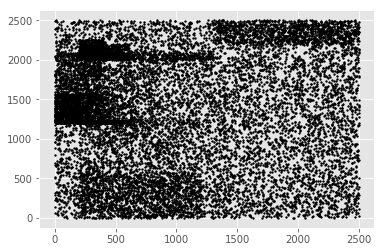

In [3]:
# Getting the values and plotting it
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=3)

In [4]:
# euclid1ean distance
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [5]:
k = 4
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
cnt = 1
print("Initial Centroids")
print(C)

Initial Centroids
[[ 447.  653.]
 [ 983.  764.]
 [ 571. 2287.]
 [ 906.  293.]]


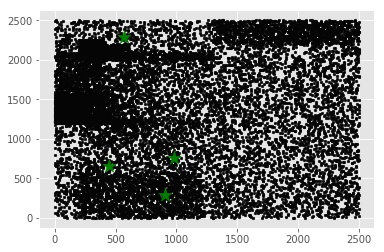

In [6]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [7]:
def cluster(X,C,cnt,stream):
    # To store the value of centroids when it updates
    C_old = np.zeros(C.shape)
    # Cluster Lables(0, 1, 2)
    clusters = np.zeros(len(X))
    # Error func. - Distance between new centroids and old centroids
    error = dist(C, C_old, None)
    # Loop will run till the error becomes zero
    while error != 0:
#         print("hello")
        # Assigning each value to its closest cluster
        for i in range(0,stream*cnt):
#         for i in range(0+(stream*(cnt-1)),stream*cnt):
#             print(i)
            distances = dist(X[i], C)
            cluster = np.argmin(distances)
            clusters[i] = cluster
        # Storing the old centroid values
        C_old = deepcopy(C)
        # Finding the new centroids by taking the average value
        for i in range(k):
#             points = [X[j] for j in range(0+(stream*(cnt-1)),stream*cnt) if clusters[j] == i]
            points = [X[j] for j in range(0,stream*cnt) if clusters[j] == i]
            C[i] = np.mean(points, axis=0)

        error = dist(C, C_old, None)
#         plot_scatter(X,clusters)
    return C,clusters

In [16]:
# import matplotlib.pyplot as plt
# import numpy as np
# import seaborn as sns
# sns.set_style("white")
# import pandas as pd
# my_dpi=96

def plot_scatter(X,clusters,cnt,stream):
    # For each year:
#     for i in range(k):
 
#     # initialize a figure
#         fig = plt.figure(figsize=(680/my_dpi, 480/my_dpi), dpi=my_dpi)
#         colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'w']
#         points = np.array([X[j] for j in range(0,stream*cnt) if clusters[j] == i])

#         # Change color with c and alpha. I map the color to the X axis value.
#     #     plt.scatter(tmp['lifeExp'], tmp['gdpPercap'] , s=tmp['pop']/200000 , c=tmp['continent'].cat.codes, cmap="Accent", alpha=0.6, edgecolors="white", linewidth=2)
#         plt.scatter(points[:,0], points[:,1] , s=3 , c = colors[i])
    
#     -------------------------------------------------------------------

    colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'w']
    fig, ax = plt.subplots()
    
    for i in range(k):
        points = np.array([X[j] for j in range(0,stream*cnt) if clusters[j] == i])

        ax.scatter(points[:, 0], points[:, 1], s=3, c=colors[i])
        
    ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')
    print("save cluster_at_"+str(stream*cnt))
    fig.savefig('cluster_at_'+str(stream*cnt)+'.png')


save cluster_at_3000
save cluster_at_6000
save cluster_at_9000
save cluster_at_12000
save cluster_at_15000


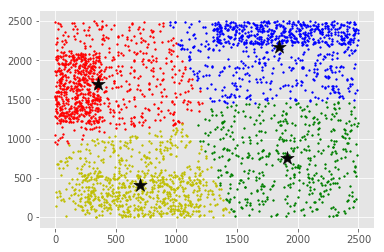

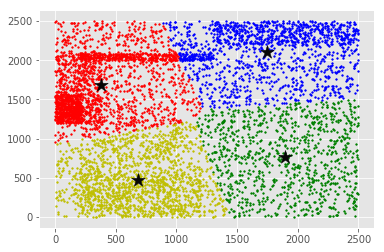

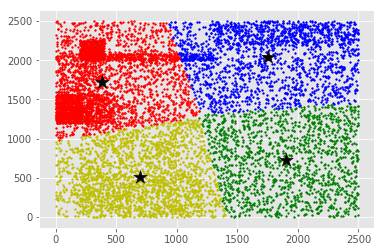

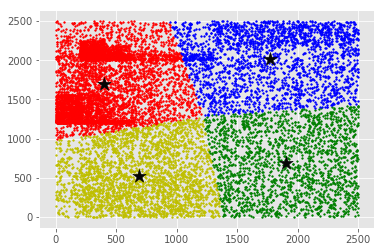

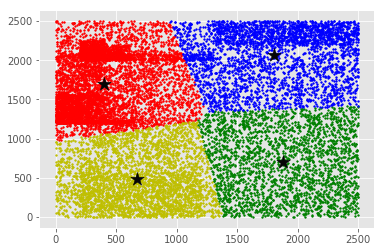

In [17]:
stream = 3000
for i in range(1,int((size/stream)+1)):
    C,clusters = cluster(X,C,i,stream)
    plot_scatter(X,clusters,i,stream)

In [19]:
import imageio

def create_gif(filenames, duration):
    images = []
    for filename in filenames:
        images.append(imageio.imread(filename))
    output_file = 'Gif-%s.gif' % datetime.datetime.now().strftime('%Y-%M-%d-%H-%M-%S')
    imageio.mimsave(output_file, images, duration=duration)


X_data shape: (0,)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
plt.rcParams['figure.figsize'] = (4, 3)
plt.style.use('ggplot')
%matplotlib notebook


# Use matplotlib ggplot stylesheet if available
try:
    plt.style.use('ggplot')
except:
    pass

# Set which type of animation will be plotted. One of:
# line, pcolor, scatter, contour, quiver, labels
animation_type = 'scatter'

# ----------------------------------------------------------------------------
# Create data to plot. F is 2D array. G is 3D array

# Create a two-dimensional array of data: F(x, t)
x = np.linspace(-3, 3, 91)
t = np.linspace(0, 25, 30)
X2, T2 = np.meshgrid(x, t)
sinT2 = np.sin(2*np.pi*T2/T2.max())
F = 0.9*sinT2*np.sinc(X2*(1 + sinT2))


# Create three-dimensional array of data G(x, z, t)
x = np.linspace(-3, 3, 91)
t = np.linspace(0, 25, 30)
y = np.linspace(-3, 3, 91)
X3, Y3, T3 = np.meshgrid(x, y, t)
sinT3 = np.sin(2*np.pi*T3 /
               T3.max(axis=2)[..., np.newaxis])
G = (X3**2 + Y3**2)*sinT3

# ----------------------------------------------------------------------------
# Set up the figure and axis
fig, ax = plt.subplots()

if animation_type not in ['line', 'scatter']:
    ax.set_aspect('equal')

# ----------------------------------------------------------------------------
if animation_type == 'scatter':
    ax.set(xlim=(-3, 3), ylim=(-1, 1))
    scat = ax.scatter(x[::3], F[0, ::3],c='b')
    def animate(i):
        # Must pass scat.set_offsets an N x 2 array
        y_i = F[i, ::3]
        scat.set_offsets(np.c_[x[::3], y_i])


# ----------------------------------------------------------------------------
# Save the animation
anim = FuncAnimation(fig, animate, interval=100, frames=len(t)-1, repeat=True)
fig.show()
# anim.save(animation_type + '.gif', writer='imagemagick')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.axis([0, 10, 0, 1])
fig, ax = plt.subplots()

for i in range(10):
    print(i)
    y = np.random.random()
    plt.scatter(i, y)
    plt.pause(0.05)

plt.show()


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2500), ylim=(0, 2500))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(X,clusters,i,stream):
    colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'w']
    fig, ax = plt.subplots()
    ax.set(xlim=(0, 2500), ylim=(0, 2500))
    
    for i in range(k):
        points = np.array([X[j] for j in range(0,stream*cnt) if clusters[j] == i])

        ax.scatter(points[:, 0], points[:, 1], s=3, c=colors[i])
        
    ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 6*np.pi, 100)
y = np.sin(x)

# You probably won't need this if you're embedding things in a tkinter plot...
plt.ion()

fig = plt.figure()
ax = fig.add_subplot(111)
line1, = ax.plot(x, y, 'r-') # Returns a tuple of line objects, thus the comma

for phase in np.linspace(0, 10*np.pi, 500):
    line1.set_ydata(np.sin(x + phase))
    fig.canvas.draw()
    fig.canvas.flush_events()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("white")
import pandas as pd
my_dpi=96
 
# Get the data (csv file is hosted on the web)
url = 'https://python-graph-gallery.com/wp-content/uploads/gapminderData.csv'
data = pd.read_csv(url)
 
# And I need to transform my categorical column (continent) in a numerical value group1->1, group2->2...
data['continent']=pd.Categorical(data['continent'])
 
# For each year:
for i in data.year.unique():
 
# initialize a figure
    fig = plt.figure(figsize=(680/my_dpi, 480/my_dpi), dpi=my_dpi)

    # Change color with c and alpha. I map the color to the X axis value.
    tmp=data[ data.year == i ]
    plt.scatter(tmp['lifeExp'], tmp['gdpPercap'] , s=tmp['pop']/200000 , c=tmp['continent'].cat.codes, cmap="Accent", alpha=0.6, edgecolors="white", linewidth=2)
 
# Add titles (main and on axis)
plt.yscale('log')
plt.xlabel("Life Expectancy")
plt.ylabel("GDP per Capita")
plt.title("Year: "+str(i) )
plt.ylim(0,100000)
plt.xlim(30, 90)
